In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

#####
id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartment interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
raw=pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)

In [4]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
raw['id'] = range(1, len(raw) + 1)
raw.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,2,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,3,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,4,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,5,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
5,6,20140512T000000,1225000.00000,4,4.50000,5420,101930,1.00000,0,0,3,11,3890,1530,2001,0,98053,47.65610,-122.00500,4760,101930
6,7,20140627T000000,257500.00000,3,2.25000,1715,6819,2.00000,0,0,3,7,1715,0,1995,0,98003,47.30970,-122.32700,2238,6819
7,8,20150115T000000,291850.00000,3,1.50000,1060,9711,1.00000,0,0,3,7,1060,0,1963,0,98198,47.40950,-122.31500,1650,9711
8,9,20150415T000000,229500.00000,3,1.00000,1780,7470,1.00000,0,0,3,7,1050,730,1960,0,98146,47.51230,-122.33700,1780,8113
9,10,20150312T000000,323000.00000,3,2.50000,1890,6560,2.00000,0,0,3,7,1890,0,2003,0,98038,47.36840,-122.03100,2390,7570


In [7]:
raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
raw.shape

(21613, 21)

In [9]:
raw.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### sqft_living=basement+above

In [10]:
raw['date'] = pd.to_datetime(raw['date'])
raw.price = raw.price.astype(int)
raw.bathrooms = raw.bathrooms.astype(int)
raw.floors = raw.floors.astype(int)
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [14]:
len(raw['zipcode'].value_counts().unique())

66

In [15]:
raw['houseage']=raw['date'].dt.year-raw['yr_built']


In [16]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,houseage
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650,59
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639,63
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062,82
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000,49
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509,5
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200,1
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007,5
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287,11


##### defining a categorical variable on basement whether there is presence of basement or not

In [17]:
def has_basement(raw):
    '''creates bool feature has_basement and drops original basement feature'''
    raw['has_underground'] = raw['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    raw = raw.drop('sqft_basement', axis = 1)
    return raw

In [18]:
raw=has_basement(raw)

##### defining a categorical variable on renovation whether houses has been renovated or not

In [19]:
def has_renovated(raw):
    raw['has_renovated']=raw['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
    raw=raw.drop('yr_renovated',axis=1)
    return raw

In [20]:
raw=has_renovated(raw)

In [21]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.51120,-122.25700,1340,5650,59,0,0
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.72100,-122.31900,1690,7639,63,1,1
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,1933,98028,47.73790,-122.23300,2720,8062,82,0,0
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,1965,98136,47.52080,-122.39300,1360,5000,49,1,0
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.61680,-122.04500,1800,7503,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,2009,98103,47.69930,-122.34600,1530,1509,5,0,0
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,2014,98146,47.51070,-122.36200,1830,7200,1,0,0
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,2009,98144,47.59440,-122.29900,1020,2007,5,0,0
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,2004,98027,47.53450,-122.06900,1410,1287,11,0,0


##### histogram to represent the frequency distribution of a few data points of column variable variable

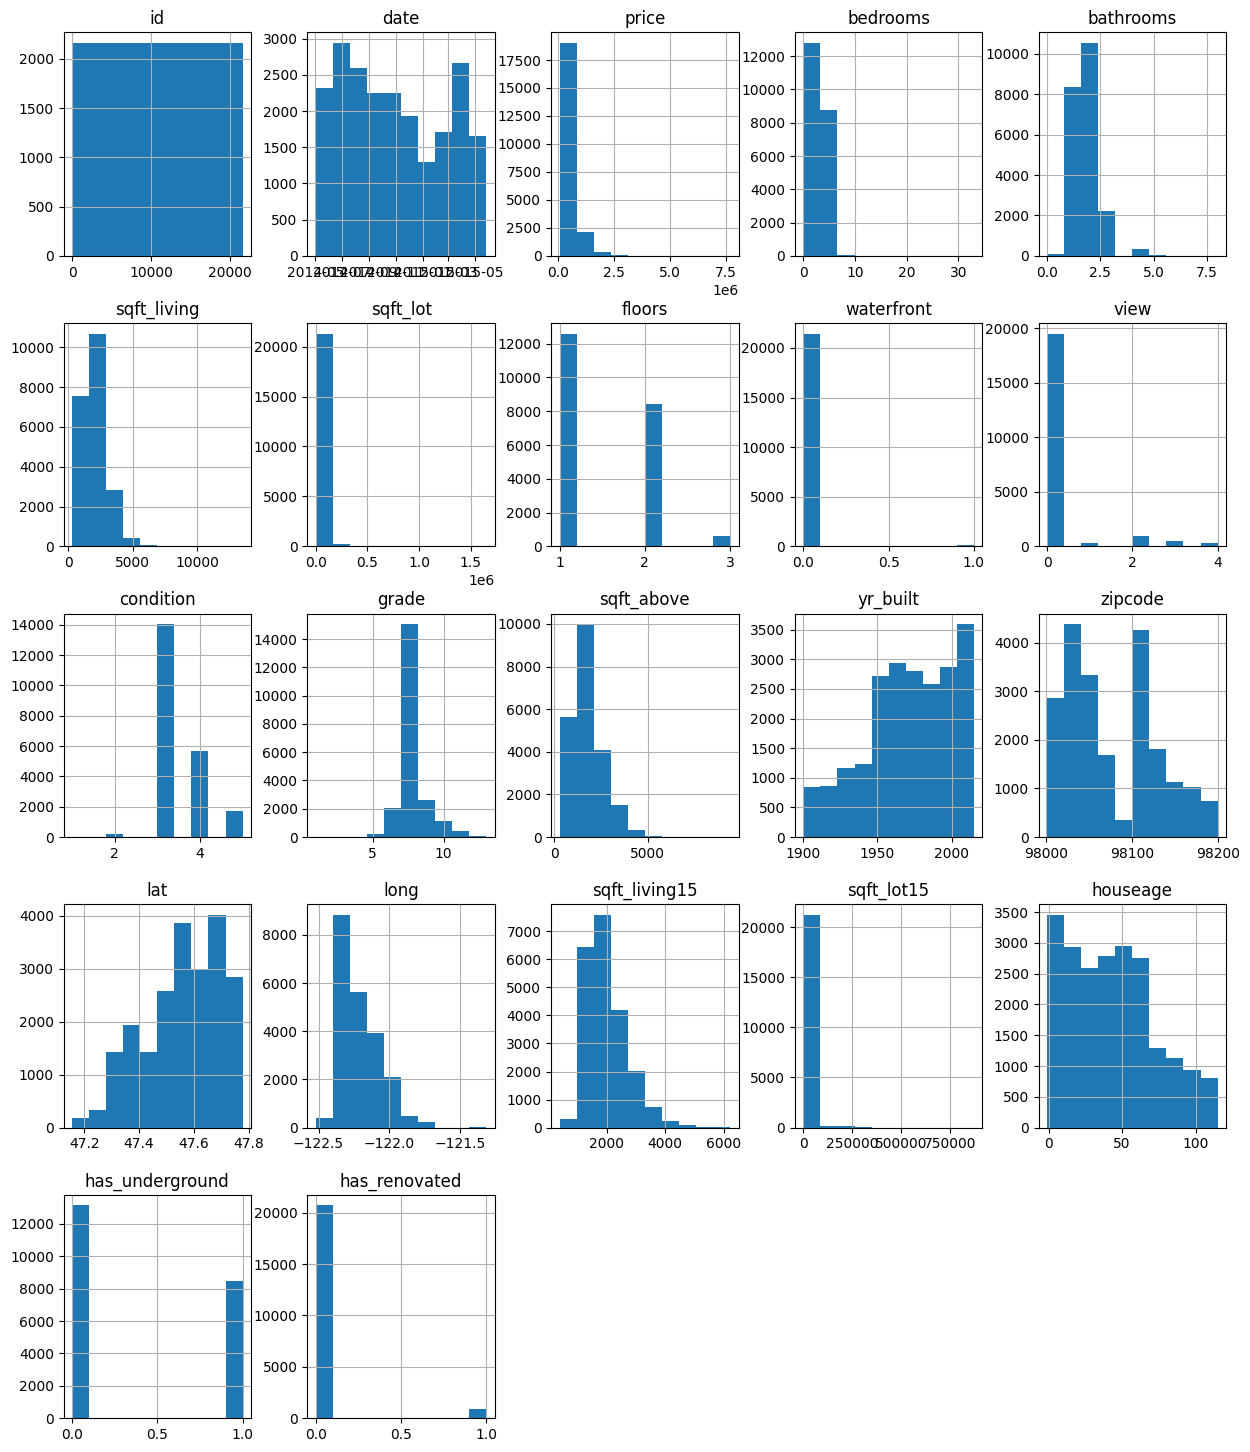

In [22]:

raw.hist(figsize = (15,18))
plt.show()

In [23]:
raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,10807.00000,540088.14177,3.37084,1.74973,2079.89974,15106.96757,1.44621,0.00754,0.23430,3.40943,7.65687,1788.39069,1971.00514,98077.93980,47.56005,-122.21390,1986.55249,12768.45565,43.31782,0.39268,0.04229
std,6239.28002,367127.19648,0.93006,0.73487,918.44090,41420.51152,0.55189,0.08652,0.76632,0.65074,1.17546,828.09098,29.37341,53.50503,0.13856,0.14083,685.39130,27304.17963,29.37549,0.48836,0.20125
min,1.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,1900.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000,-1.00000,0.00000,0.00000
25%,5404.00000,321950.00000,3.00000,1.00000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,1951.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000,18.00000,0.00000,0.00000
50%,10807.00000,450000.00000,3.00000,2.00000,1910.00000,7618.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1560.00000,1975.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000,40.00000,0.00000,0.00000
75%,16210.00000,645000.00000,4.00000,2.00000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,1997.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000,63.00000,1.00000,0.00000
max,21613.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.00000,1.00000,4.00000,5.00000,13.00000,9410.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000,115.00000,1.00000,1.00000


##### boxplot to view any presence ofoutliers in the dataset

In [24]:
raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'houseage', 'has_underground', 'has_renovated'],
      dtype='object')

<AxesSubplot: xlabel='price'>

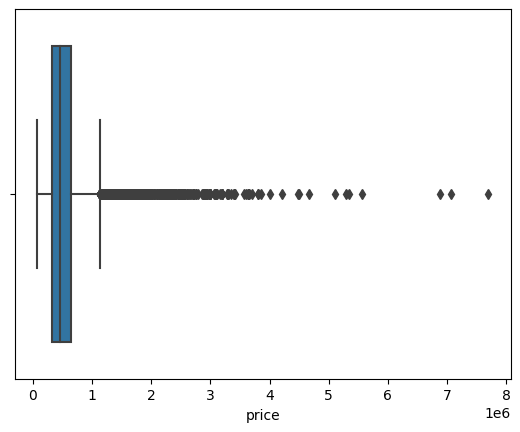

In [25]:
sns.boxplot(x=raw['price'])

<AxesSubplot: xlabel='bedrooms'>

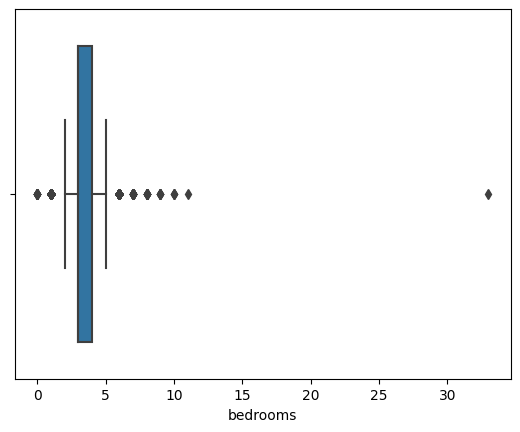

In [26]:
sns.boxplot(x=raw['bedrooms'])

<AxesSubplot: xlabel='sqft_living'>

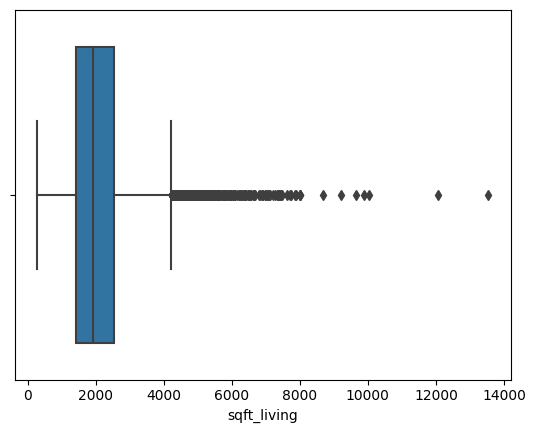

In [27]:
sns.boxplot(x=raw['sqft_living'])

<AxesSubplot: xlabel='sqft_lot'>

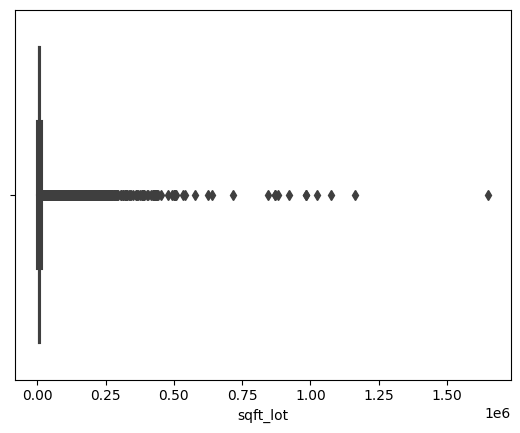

In [28]:
sns.boxplot(x=raw['sqft_lot'])

<AxesSubplot: xlabel='floors'>

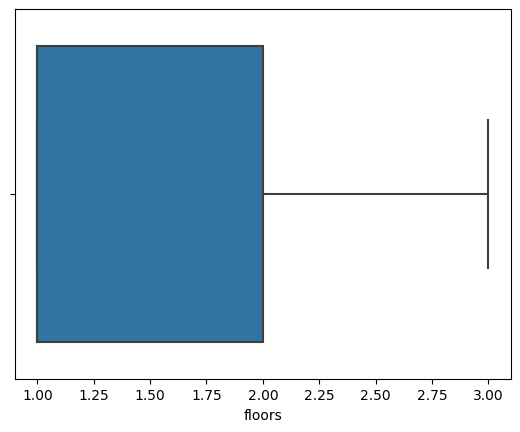

In [29]:
sns.boxplot(x=raw['floors'])

##### value of the z-score tells you how many standard deviations you are away from the mean.
##### using z score to calculate the outliers using the upper limit and lower limit of the variables

#####    Upper: Mean + 3 * standard deviation.
#####    Lower: MEan – 3 * standard deviation.

##### The function removes the outliers by selecting only the entries that have an absolute value of the Z-score less than or equal to 3 times the standard deviation of the column.

In [31]:
def remove_outliers(raw):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
#         print('the mean of' + variable)
        raw = raw[np.abs(raw[variable]-raw[variable].mean()) <= (3*raw[variable].std())]  
    return raw

##### 
np.abs(raw[variable]-raw[variable].mean()) calculates the absolute deviation of each value in the column from the mean.
(3*raw[variable].std()) calculates three times the standard deviation of the column.
<= compares each absolute deviation to three times the standard deviation, resulting in a boolean mask indicating whether each value is within three standard deviations of the mean.

In [32]:
raw = remove_outliers(raw)

##### calculating mean of the variables


In [163]:
v = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for var in v:
    print(f"mean is {var} is :{raw[var].mean()}")

mean is bedrooms is :3.3196112633939694
mean is bathrooms is :1.673112384749564
mean is sqft_living is :1959.137552952903
mean is sqft_lot is :9601.866533765264
mean is sqft_above is :1683.2808372788438
mean is lat is :47.56060572140543
mean is long is :-122.22168362820832
mean is sqft_living15 is :1910.9431348118615
mean is sqft_lot15 is :8785.837976576127


##### calculating SD of variables

In [164]:
v = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for sd in v:
    print(f"standard deviation is {sd} is :{raw[sd].std()}")
    print(f"standard deviation times 3 is {sd} is :{3*raw[sd].std()}")

standard deviation is bedrooms is :0.8565738429334919
standard deviation times 3 is bedrooms is :2.5697215288004758
standard deviation is bathrooms is :0.6342396823439136
standard deviation times 3 is bathrooms is :1.9027190470317408
standard deviation is sqft_living is :739.414304213282
standard deviation times 3 is sqft_living is :2218.242912639846
standard deviation is sqft_lot is :10265.986058466107
standard deviation times 3 is sqft_lot is :30797.958175398322
standard deviation is sqft_above is :680.4649956984634
standard deviation times 3 is sqft_above is :2041.3949870953902
standard deviation is lat is :0.1388524567408931
standard deviation times 3 is lat is :0.41655737022267936
standard deviation is long is :0.13617582438569084
standard deviation times 3 is long is :0.4085274731570725
standard deviation is sqft_living15 is :591.5853177721617
standard deviation times 3 is sqft_living15 is :1774.7559533164851
standard deviation is sqft_lot15 is :7376.146839527979
standard deviati

In [33]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.51120,-122.25700,1340,5650,59,0,0
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.72100,-122.31900,1690,7639,63,1,1
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,1933,98028,47.73790,-122.23300,2720,8062,82,0,0
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,1965,98136,47.52080,-122.39300,1360,5000,49,1,0
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.61680,-122.04500,1800,7503,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,2009,98103,47.69930,-122.34600,1530,1509,5,0,0
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,2014,98146,47.51070,-122.36200,1830,7200,1,0,0
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,2009,98144,47.59440,-122.29900,1020,2007,5,0,0
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,2004,98027,47.53450,-122.06900,1410,1287,11,0,0


In [34]:
raw=raw.drop(['date','waterfront','id','condition','zipcode','yr_built','grade'],axis=1)

In [35]:
raw.corr()['price']

price              1.00000
bedrooms           0.27767
bathrooms          0.39242
sqft_living        0.61562
sqft_lot           0.08777
floors             0.21374
view               0.36196
sqft_above         0.49542
lat                0.38595
long              -0.01148
sqft_living15      0.54408
sqft_lot15         0.09078
houseage           0.00080
has_underground    0.20054
has_renovated      0.13462
Name: price, dtype: float64

In [36]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
count,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000,20065.00000
mean,498628.71777,3.31961,1.67311,1959.13755,9601.86653,1.42716,0.19726,1683.28084,47.56061,-122.22168,1910.94313,8785.83798,44.31498,0.39123,0.04067
std,269495.03055,0.85657,0.63424,739.41430,10265.98606,0.55056,0.69943,680.46500,0.13885,0.13618,591.58532,7376.14684,29.41230,0.48804,0.19752
min,75000.00000,1.00000,0.00000,370.00000,520.00000,1.00000,0.00000,370.00000,47.15590,-122.51200,460.00000,651.00000,-1.00000,0.00000,0.00000
25%,315000.00000,3.00000,1.00000,1400.00000,5000.00000,1.00000,0.00000,1170.00000,47.47130,-122.33200,1470.00000,5000.00000,19.00000,0.00000,0.00000
50%,438900.00000,3.00000,2.00000,1850.00000,7376.00000,1.00000,0.00000,1510.00000,47.57190,-122.24800,1800.00000,7453.00000,42.00000,0.00000,0.00000
75%,610000.00000,4.00000,2.00000,2430.00000,9967.00000,2.00000,0.00000,2080.00000,47.67960,-122.13900,2280.00000,9630.00000,64.00000,1.00000,0.00000
max,3070000.00000,6.00000,3.00000,4520.00000,130680.00000,3.00000,4.00000,3890.00000,47.77760,-121.31500,3780.00000,56257.00000,115.00000,1.00000,1.00000


In [37]:
raw.shape

(20065, 15)

##### An observation with 33 bedrooms in 1620 ft, and come with only 1 bathrooms. The data was imputed to only 3 bedrooms.

In [38]:
# raw['bedrooms'].idxmax()
# raw['bedrooms']=raw['bedrooms'].replace(33,3)
#raw.iloc[[15870]]

#### removing outlier of maximum sqft_lot

In [39]:
raw.drop(raw[raw['sqft_lot15'] >= 550000].index, inplace = True)
raw.drop(raw[raw['sqft_lot'] >= 55000].index, inplace = True)


In [40]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
count,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000
mean,497795.86503,3.31858,1.67272,1955.46758,8955.34730,1.42809,0.19614,1679.81060,47.56087,-122.22273,1907.25298,8551.27205,44.35143,0.39187,0.04060
std,268768.71674,0.85524,0.63331,737.33488,7606.75259,0.55109,0.69712,678.46588,0.13854,0.13570,590.02467,6858.35397,29.47746,0.48818,0.19736
min,75000.00000,1.00000,0.00000,370.00000,520.00000,1.00000,0.00000,370.00000,47.15590,-122.51200,460.00000,651.00000,-1.00000,0.00000,0.00000
25%,315000.00000,3.00000,1.00000,1400.00000,5000.00000,1.00000,0.00000,1170.00000,47.47245,-122.33300,1460.00000,5000.00000,19.00000,0.00000,0.00000
50%,437400.00000,3.00000,2.00000,1850.00000,7350.00000,1.00000,0.00000,1510.00000,47.57200,-122.25200,1800.00000,7420.00000,42.00000,0.00000,0.00000
75%,610000.00000,4.00000,2.00000,2420.00000,9864.00000,2.00000,0.00000,2080.00000,47.67960,-122.14200,2270.00000,9600.00000,64.00000,1.00000,0.00000
max,3065000.00000,6.00000,3.00000,4520.00000,54977.00000,3.00000,4.00000,3890.00000,47.77760,-121.31500,3780.00000,55321.00000,115.00000,1.00000,1.00000


##### incrementing the housage by one as some houses had negative ages which are outliers

In [41]:
raw.loc[raw['houseage']<=0,'houseage'] +=1

In [42]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
count,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000
mean,497795.86503,3.31858,1.67272,1955.46758,8955.34730,1.42809,0.19614,1679.81060,47.56087,-122.22273,1907.25298,8551.27205,44.37175,0.39187,0.04060
std,268768.71674,0.85524,0.63331,737.33488,7606.75259,0.55109,0.69712,678.46588,0.13854,0.13570,590.02467,6858.35397,29.44718,0.48818,0.19736
min,75000.00000,1.00000,0.00000,370.00000,520.00000,1.00000,0.00000,370.00000,47.15590,-122.51200,460.00000,651.00000,0.00000,0.00000,0.00000
25%,315000.00000,3.00000,1.00000,1400.00000,5000.00000,1.00000,0.00000,1170.00000,47.47245,-122.33300,1460.00000,5000.00000,19.00000,0.00000,0.00000
50%,437400.00000,3.00000,2.00000,1850.00000,7350.00000,1.00000,0.00000,1510.00000,47.57200,-122.25200,1800.00000,7420.00000,42.00000,0.00000,0.00000
75%,610000.00000,4.00000,2.00000,2420.00000,9864.00000,2.00000,0.00000,2080.00000,47.67960,-122.14200,2270.00000,9600.00000,64.00000,1.00000,0.00000
max,3065000.00000,6.00000,3.00000,4520.00000,54977.00000,3.00000,4.00000,3890.00000,47.77760,-121.31500,3780.00000,55321.00000,115.00000,1.00000,1.00000


In [43]:
raw.corr()['price']

price              1.00000
bedrooms           0.27806
bathrooms          0.39315
sqft_living        0.61603
sqft_lot           0.09087
floors             0.21440
view               0.36239
sqft_above         0.49518
lat                0.38733
long              -0.01400
sqft_living15      0.54415
sqft_lot15         0.08647
houseage           0.00273
has_underground    0.20225
has_renovated      0.13683
Name: price, dtype: float64

In [44]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
count,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000
mean,497795.86503,3.31858,1.67272,1955.46758,8955.34730,1.42809,0.19614,1679.81060,47.56087,-122.22273,1907.25298,8551.27205,44.37175,0.39187,0.04060
std,268768.71674,0.85524,0.63331,737.33488,7606.75259,0.55109,0.69712,678.46588,0.13854,0.13570,590.02467,6858.35397,29.44718,0.48818,0.19736
min,75000.00000,1.00000,0.00000,370.00000,520.00000,1.00000,0.00000,370.00000,47.15590,-122.51200,460.00000,651.00000,0.00000,0.00000,0.00000
25%,315000.00000,3.00000,1.00000,1400.00000,5000.00000,1.00000,0.00000,1170.00000,47.47245,-122.33300,1460.00000,5000.00000,19.00000,0.00000,0.00000
50%,437400.00000,3.00000,2.00000,1850.00000,7350.00000,1.00000,0.00000,1510.00000,47.57200,-122.25200,1800.00000,7420.00000,42.00000,0.00000,0.00000
75%,610000.00000,4.00000,2.00000,2420.00000,9864.00000,2.00000,0.00000,2080.00000,47.67960,-122.14200,2270.00000,9600.00000,64.00000,1.00000,0.00000
max,3065000.00000,6.00000,3.00000,4520.00000,54977.00000,3.00000,4.00000,3890.00000,47.77760,-121.31500,3780.00000,55321.00000,115.00000,1.00000,1.00000


#### we found that there are 13 entries without any bedrooms in the house. Since it is not common to have houses without bedrooms, thus we decided to exclude these observations.

In [45]:
raw.drop(raw[raw['bedrooms']==0].index,inplace=True)

##### pearson correlation matrix to see the correlations between the columns

<AxesSubplot: title={'center': 'Pearson Correlation Matrix'}>

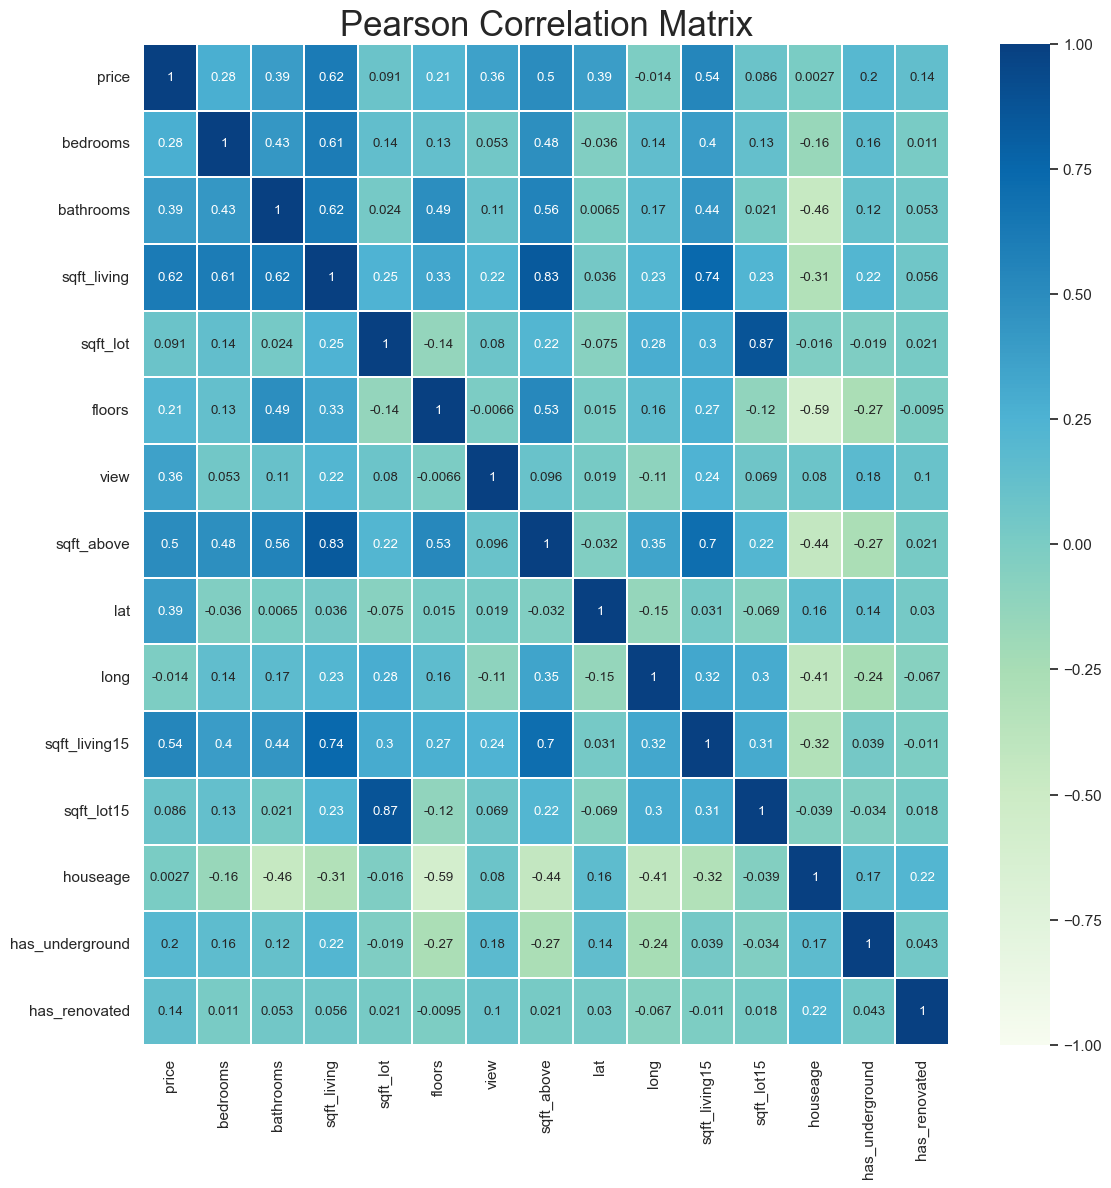

In [46]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(raw.corr(),linewidths=0.25,vmax=1,vmin=-1,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":9.5}, cbar={"shrink": 1})

In [47]:
raw.dtypes

price                int32
bedrooms             int64
bathrooms            int32
sqft_living          int64
sqft_lot             int64
floors               int32
view                 int64
sqft_above           int64
lat                float64
long               float64
sqft_living15        int64
sqft_lot15           int64
houseage             int64
has_underground      int64
has_renovated        int64
dtype: object

In [48]:
raw

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
0,221900,3,1,1180,5650,1,0,1180,47.51120,-122.25700,1340,5650,59,0,0
1,538000,3,2,2570,7242,2,0,2170,47.72100,-122.31900,1690,7639,63,1,1
2,180000,2,1,770,10000,1,0,770,47.73790,-122.23300,2720,8062,82,0,0
3,604000,4,3,1960,5000,1,0,1050,47.52080,-122.39300,1360,5000,49,1,0
4,510000,3,2,1680,8080,1,0,1680,47.61680,-122.04500,1800,7503,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,1131,3,0,1530,47.69930,-122.34600,1530,1509,5,0,0
21609,400000,4,2,2310,5813,2,0,2310,47.51070,-122.36200,1830,7200,1,0,0
21610,402101,2,0,1020,1350,2,0,1020,47.59440,-122.29900,1020,2007,5,0,0
21611,400000,3,2,1600,2388,2,0,1600,47.53450,-122.06900,1410,1287,11,0,0


In [49]:
dfq1=raw.copy()

C:\Users\nepal\AppData\Local\Temp\ipykernel_10104\368876404.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(smap, label = 'price in USD')


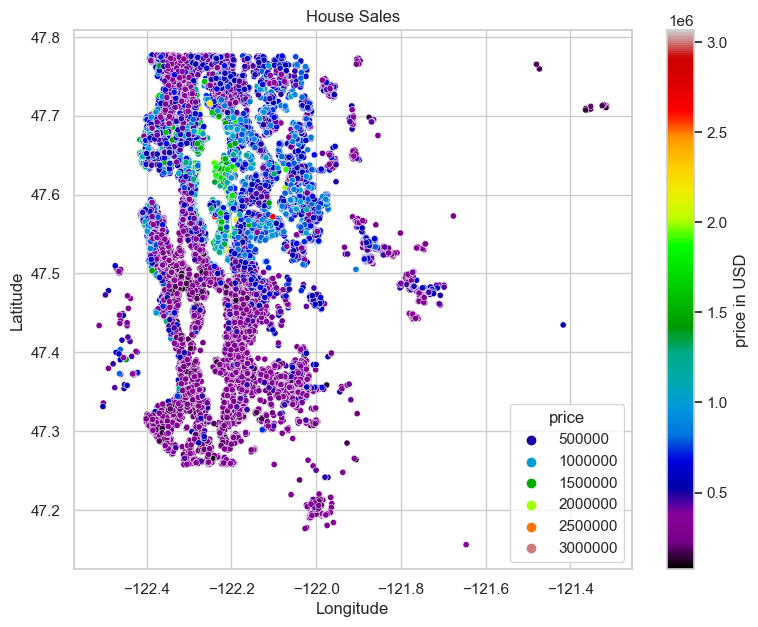

In [51]:
# Plot scatter plot
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = dfq1['long'], y = dfq1['lat'], hue = dfq1['price'],
                palette = 'nipy_spectral',s=20, data = dfq1)

norm = plt.Normalize(dfq1['price'].min(), dfq1['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Sales')
plt.show()

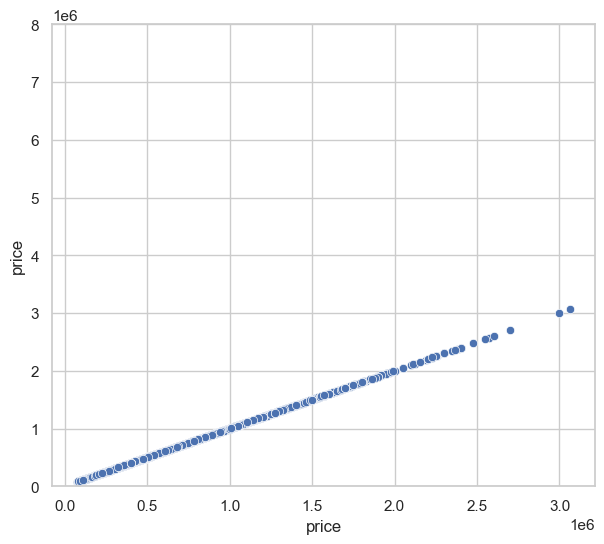

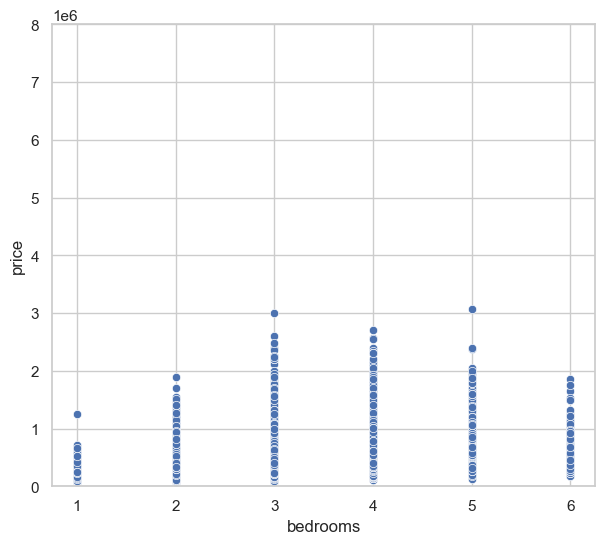

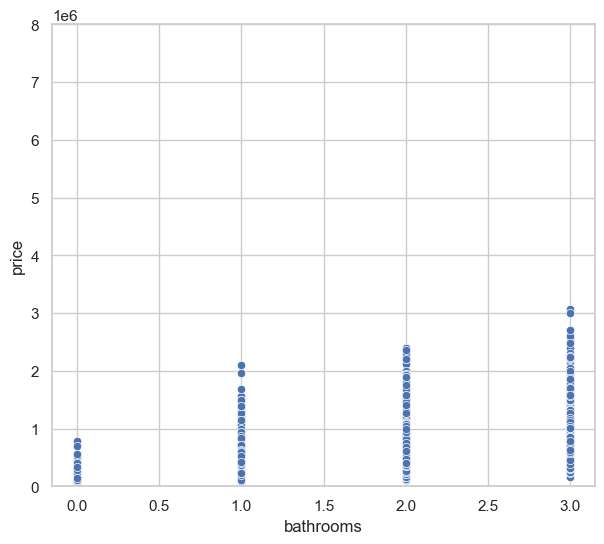

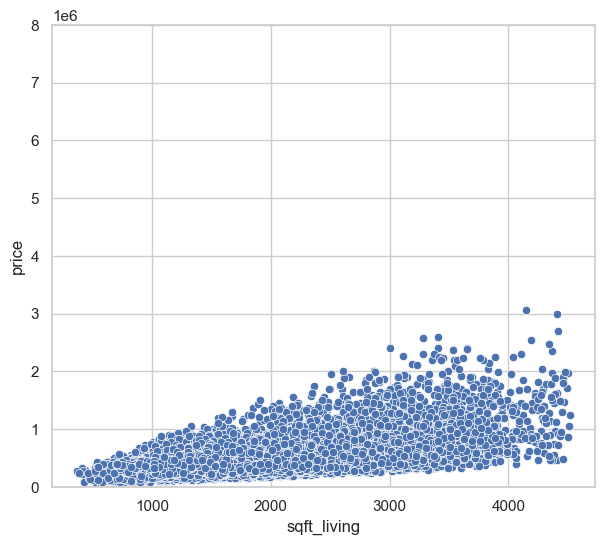

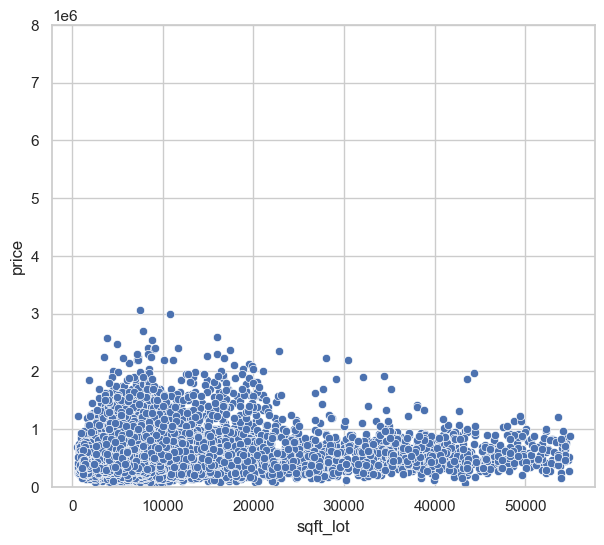

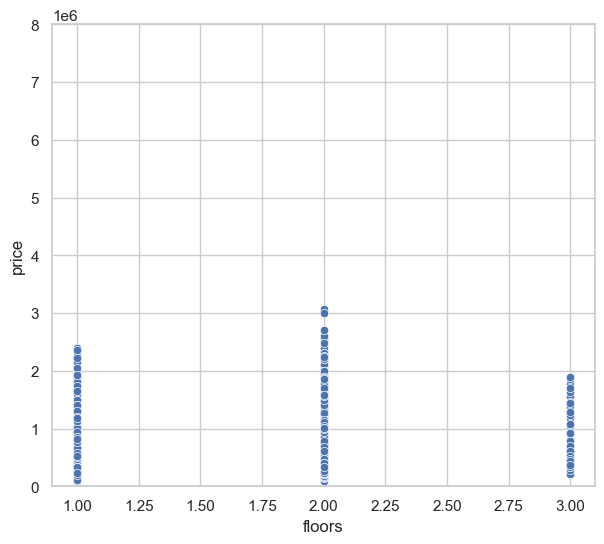

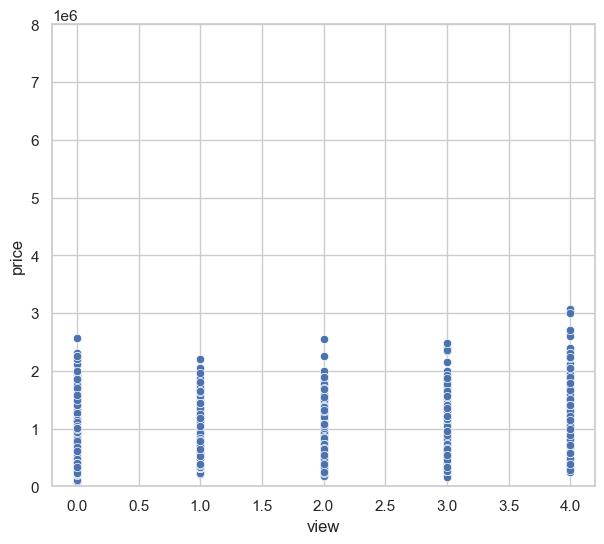

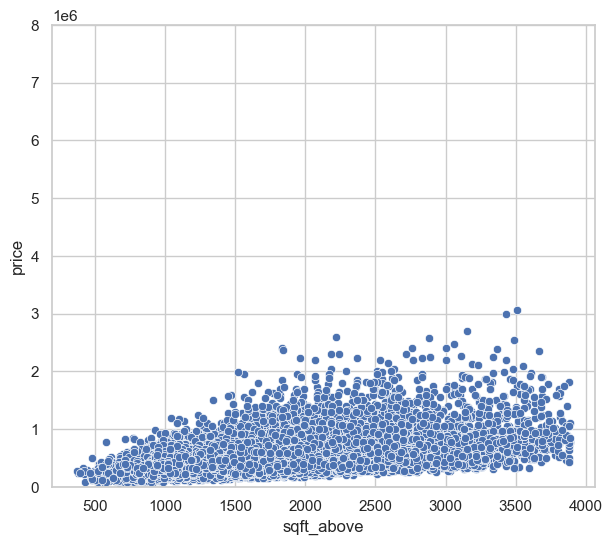

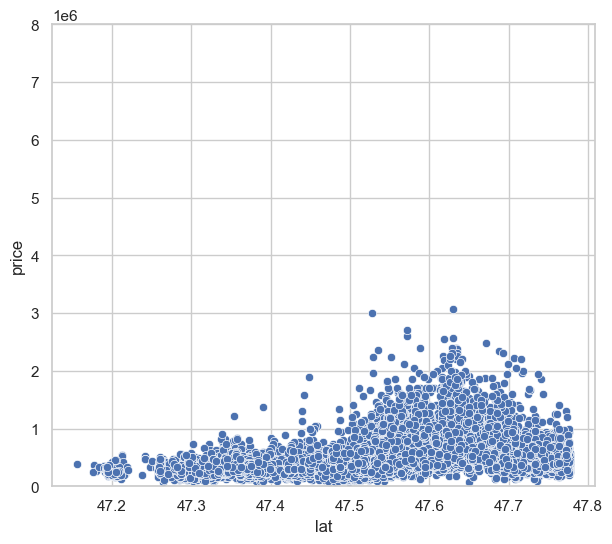

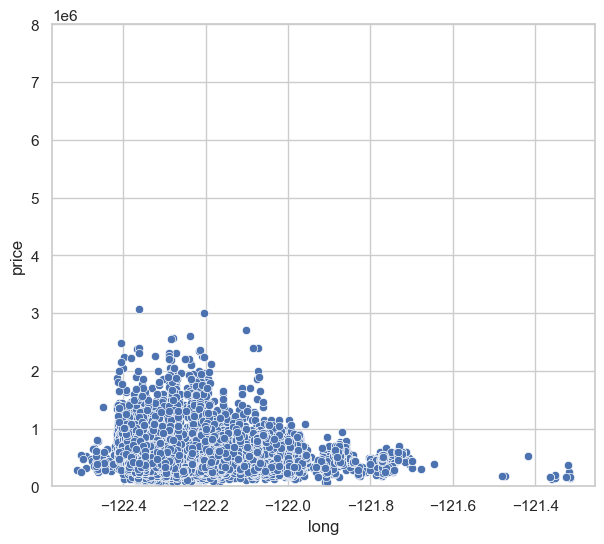

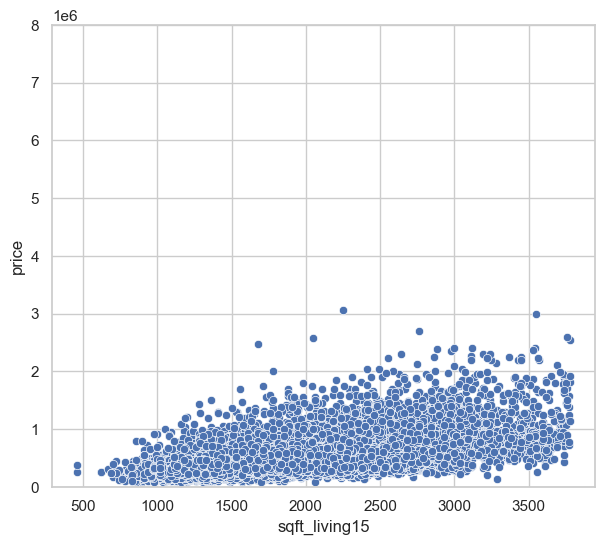

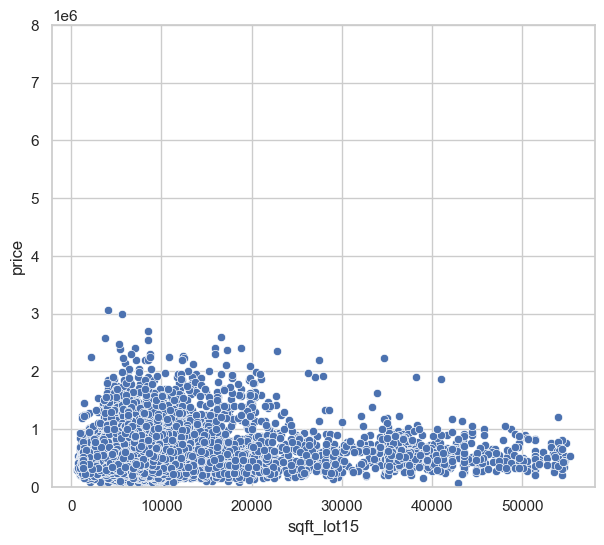

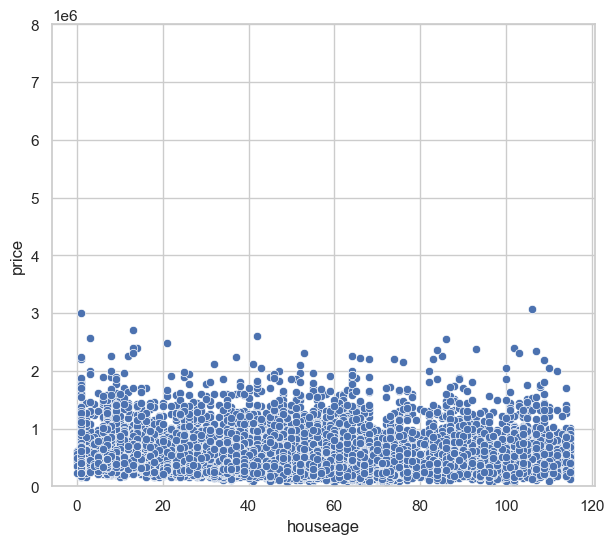

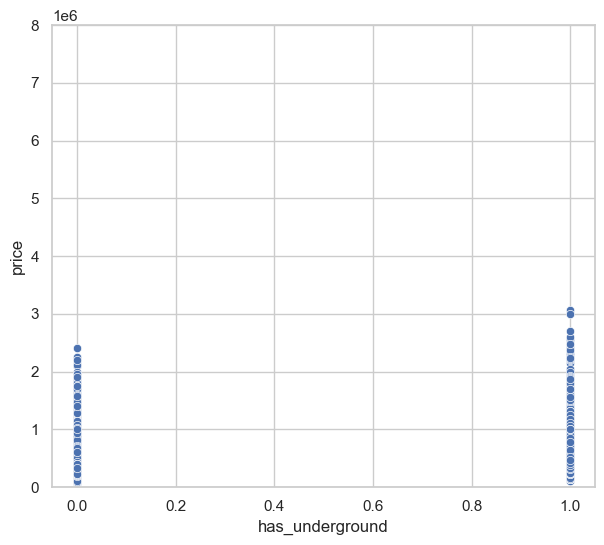

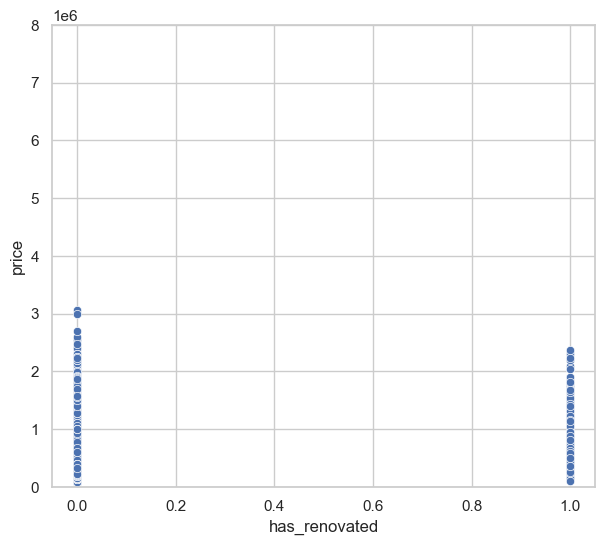

In [52]:
for c in raw.columns:
    plt.figure(figsize=(7,6))
    plt.ylim(0,8000000)
    sns.scatterplot(x=c,y='price',data=raw)

In [53]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
count,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000,19879.00000
mean,497795.86503,3.31858,1.67272,1955.46758,8955.34730,1.42809,0.19614,1679.81060,47.56087,-122.22273,1907.25298,8551.27205,44.37175,0.39187,0.04060
std,268768.71674,0.85524,0.63331,737.33488,7606.75259,0.55109,0.69712,678.46588,0.13854,0.13570,590.02467,6858.35397,29.44718,0.48818,0.19736
min,75000.00000,1.00000,0.00000,370.00000,520.00000,1.00000,0.00000,370.00000,47.15590,-122.51200,460.00000,651.00000,0.00000,0.00000,0.00000
25%,315000.00000,3.00000,1.00000,1400.00000,5000.00000,1.00000,0.00000,1170.00000,47.47245,-122.33300,1460.00000,5000.00000,19.00000,0.00000,0.00000
50%,437400.00000,3.00000,2.00000,1850.00000,7350.00000,1.00000,0.00000,1510.00000,47.57200,-122.25200,1800.00000,7420.00000,42.00000,0.00000,0.00000
75%,610000.00000,4.00000,2.00000,2420.00000,9864.00000,2.00000,0.00000,2080.00000,47.67960,-122.14200,2270.00000,9600.00000,64.00000,1.00000,0.00000
max,3065000.00000,6.00000,3.00000,4520.00000,54977.00000,3.00000,4.00000,3890.00000,47.77760,-121.31500,3780.00000,55321.00000,115.00000,1.00000,1.00000


In [54]:
raw.to_csv('final_dataset.csv',index=False)

## model testing